### Statistiek
Hier vind je de algemene verwerking van de data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, chisquare
import numpy as np


In [3]:
### data inladen
wedstrijden = pd.read_excel('../../Data/Silver/wedstrijden_cleaned.xlsx')
corners = pd.read_excel('../../Data/Silver/cornerballen_cleaned.xlsx')

merged_df = pd.merge(wedstrijden, corners, on='wedstrijd_id', how='left')


<Axes: title={'center': 'Aantal wedstrijden per niveau'}, xlabel='Niveau', ylabel='Aantal wedstrijden'>

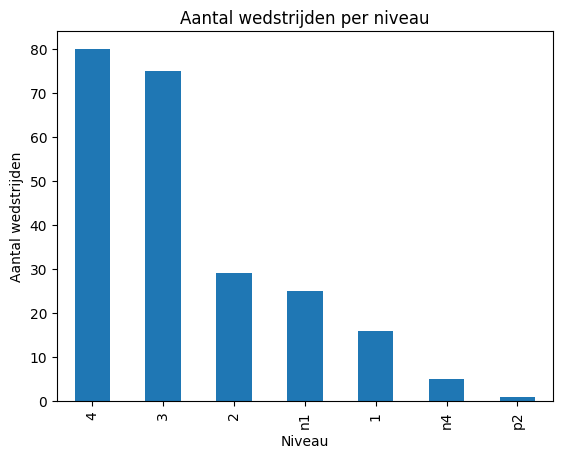

In [4]:
# distributie van de wedstrijden per niveau

wedstrijden["niveau"].value_counts().plot(kind='bar', title='Aantal wedstrijden per niveau', xlabel='Niveau', ylabel='Aantal wedstrijden')


### scorepercentages

In [5]:
### scorepercentages
# algemeen
# aantal wedstrijden
aantal_wedstrijden = wedstrijden["wedstrijd_id"].nunique()
print(f"Aantal wedstrijden: {aantal_wedstrijden}")

# aantal schepcorners
aantal_schepcorners = corners.shape[0]
print(f"Aantal schepcorners: {aantal_schepcorners}")
print(f"gemiddeld aantal schepcorner per wedstrijd: {aantal_schepcorners/aantal_wedstrijden:.2f}")

# aantal gescoorde schepcorners
gescoorde_schepcorners = corners["goal"].sum()
print(f"Aantal gescoorde schepcorners: {gescoorde_schepcorners}")
scorepercentage = gescoorde_schepcorners / aantal_schepcorners * 100    
print(f"Scorepercentage: {scorepercentage:.2f}%")

Aantal wedstrijden: 231
Aantal schepcorners: 603
gemiddeld aantal schepcorner per wedstrijd: 2.61
Aantal gescoorde schepcorners: 399
Scorepercentage: 66.17%


In [6]:
# verschil van de scorepercentages per niveau
scorepercentages_per_niveau = merged_df.groupby("niveau")["goal"].mean() * 100


# aantal wedstrijden per niveau
aantal_wedstrijden_per_niveau = merged_df.groupby("niveau")["wedstrijd_id"].nunique()

# aantal schepcorners per niveau
aantal_schepcorners_per_niveau = merged_df.groupby("niveau")["schepcorner_id"].nunique()

# merge de dataframes
niveau_distributie = pd.DataFrame({
    "aantal_wedstrijden": aantal_wedstrijden_per_niveau,
    "aantal_schepcorners": aantal_schepcorners_per_niveau,
    "scorepercentage": scorepercentages_per_niveau
}).reset_index()
niveau_distributie

,niveau,aantal_wedstrijden,aantal_schepcorners,scorepercentage
0,1,16,42,69.047619
1,2,29,75,72.000000
2,3,75,182,63.736264
3,4,80,206,57.766990
4,n1,25,81,86.419753
5,n4,5,13,76.923077
6,p2,1,4,25.000000


In [7]:
def plot_barchart_with_annotations(df, x_column, y_column, annotation_column, x_label, y_label, titel, hoogte=30, figsize=(8, 5), rotate_x_labels=False):
    """
    Functie om een balkgrafiek te plotten met annotaties boven de balken.
    
    Parameters:
    - df: DataFrame met de data
    - x_column: naam van de kolom voor de x-as (bijv. 'kwart')
    - y_column: naam van de kolom voor de y-as (bijv. 'aantal_schepcorners')
    - annotation_column: naam van de kolom voor annotaties boven de balken (bijv. 'scorepercentage')
    - x_label: label voor de x-as
    - y_label: label voor de y-as
    - titel: titel van de grafiek
    """
    # Academische stijl instellen
    sns.set_theme(style="whitegrid", font_scale=1.2, rc={
        'axes.edgecolor': 'black',
        'axes.labelweight': 'bold',
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 11,
        'ytick.labelsize': 11,
        'font.family': 'serif'
    })
    
    plt.figure(figsize=figsize)
    
    # Balkgrafiek: y-as en x-as instellen
    ax = sns.barplot(
        data=df,
        x=x_column,
        y=y_column,
        color='grey',
        edgecolor='black'
    )
    
    # Annotaties: scorepercentage boven elke balk
    for i, row in df.iterrows():
        ax.text(
            i, row[y_column] + 3,  # Plaatsing van de annotatie boven de balk
            f"{row[annotation_column]:.1f}% \ngescoord",  # Format van de annotatie (scorepercentage)
            ha='center', va='bottom',
            fontsize=10, fontstyle='italic'
        )
    
    # Aslabels en titel
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(titel, pad=15)
    
    # Y-as iets boven hoogste waarde laten uitkomen voor ruimte
    plt.ylim(0, df[y_column].max() + hoogte)
    if rotate_x_labels:
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Weergeven van de grafiek
    plt.show()

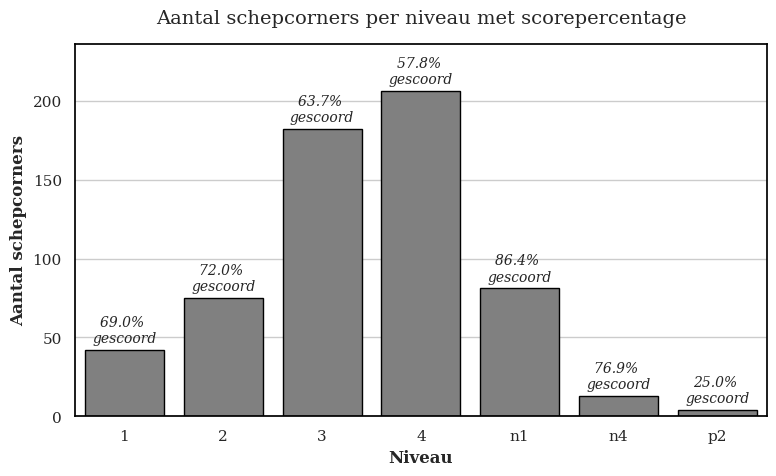

In [8]:
plot_barchart_with_annotations(
    niveau_distributie,
    x_column='niveau',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Niveau',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per niveau met scorepercentage'
)

In [9]:
### percentage per kwart
# aantal schepcorners per kwart
aantal_schepcorners_per_kwart = corners["kwart"].value_counts()

# aantal gescoorde schepcorners per kwart
aantal_gescoord_per_kwart = corners.groupby("kwart")["goal"].sum()

kwart_distributie = pd.DataFrame({
    "aantal_schepcorners": aantal_schepcorners_per_kwart,
    "aantal_gescoord": aantal_gescoord_per_kwart,
    "scorepercentage": aantal_gescoord_per_kwart / aantal_schepcorners_per_kwart * 100
}).reset_index()
kwart_distributie



,kwart,aantal_schepcorners,aantal_gescoord,scorepercentage
0,1,63,47,74.603175
1,2,168,118,70.238095
2,3,205,131,63.902439
3,4,167,103,61.676647


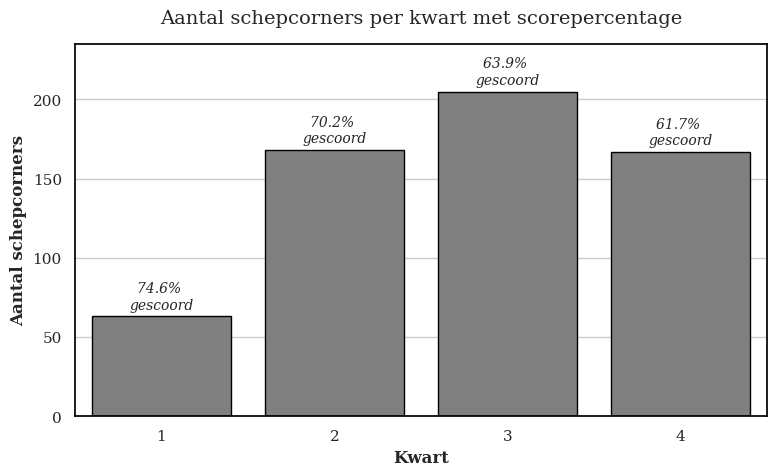

In [10]:
plot_barchart_with_annotations(
    kwart_distributie,
    x_column='kwart',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Kwart',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per kwart met scorepercentage'
)

In [11]:
def calculate_distribution_by_column(df, column_name):
    """
    Functie om het aantal schepcorners per unieke waarde van een opgegeven kolom te berekenen,
    evenals het scorepercentage (aantal gescoorde schepcorners / aantal schepcorners).
    
    Parameters:
    - df: DataFrame met de data
    - column_name: naam van de kolom waarvoor de verdeling berekend moet worden
    
    Returns:
    - DataFrame met de kolommen voor de opgegeven 'column_name', 'aantal_schepcorners', 'aantal_gescoord', 'scorepercentage'
    """
    # Aantal schepcorners per waarde van de opgegeven kolom
    aantal_schepcorners_per_value = df[column_name].value_counts()

    # Aantal gescoorde schepcorners per waarde van de opgegeven kolom
    aantal_gescoord_per_value = df.groupby(column_name)["goal"].sum()

    # DataFrame met de verdeling
    distributie_df = pd.DataFrame({
        "aantal_schepcorners": aantal_schepcorners_per_value,
        "aantal_gescoord": aantal_gescoord_per_value,
        "scorepercentage": aantal_gescoord_per_value / aantal_schepcorners_per_value * 100
    }).reset_index()
        
    return distributie_df

In [12]:
schepper_positie_distributie = calculate_distribution_by_column(corners, "schepper_pos_rechts")
schepper_positie_distributie['schepper_pos_rechts'] = schepper_positie_distributie['schepper_pos_rechts'].replace({1: 'Rechts', 0: 'Links'})
schepper_positie_distributie


,schepper_pos_rechts,aantal_schepcorners,aantal_gescoord,scorepercentage
0,Links,167,109,65.269461
1,Rechts,436,290,66.513761


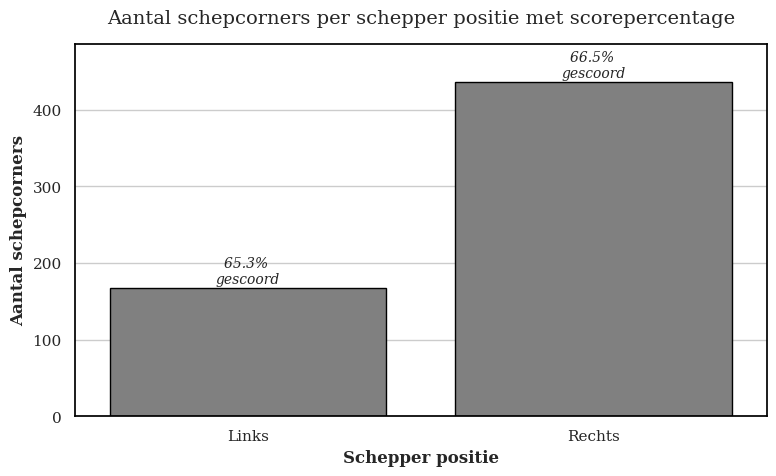

In [13]:
plot_barchart_with_annotations(schepper_positie_distributie,
    x_column='schepper_pos_rechts',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Schepper positie',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per schepper positie met scorepercentage',
    hoogte=50
)

In [14]:
kopper_positie_distributie = calculate_distribution_by_column(corners, "positie")
kopper_positie_distributie['positie'] = kopper_positie_distributie['positie'].replace({1: 'Linksvoor', 2: 'Middenvoor', 3: 'Rechtsvoor', 4: 'Linksachter', 5: 'Middenachter', 6: 'Rechtsachter'})
kopper_positie_distributie

,positie,aantal_schepcorners,aantal_gescoord,scorepercentage
0,Linksvoor,11,6,54.545455
1,Middenvoor,188,130,69.148936
2,Rechtsvoor,17,10,58.823529
3,Linksachter,32,19,59.375000
4,Middenachter,332,218,65.662651
5,Rechtsachter,23,16,69.565217


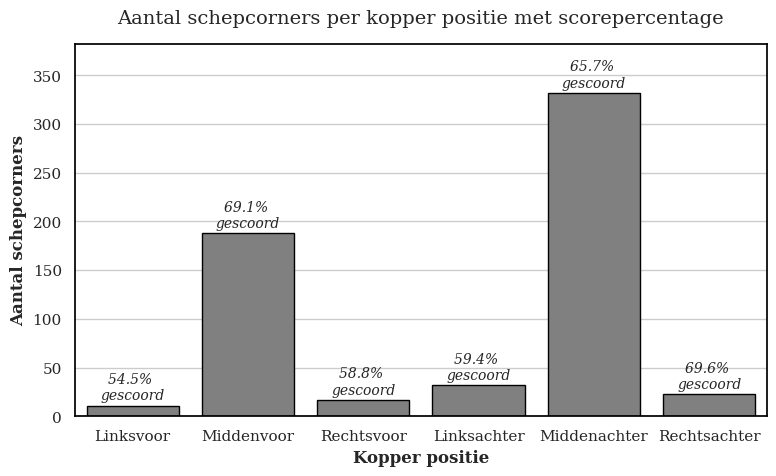

In [15]:
plot_barchart_with_annotations(
    kopper_positie_distributie,
    x_column='positie',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Kopper positie',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per kopper positie met scorepercentage',
    hoogte=50
)

In [16]:
### nu doen we hetzelfde maar met posities voor en achter en links/midden/rechts
kopper_positie_distributie

,positie,aantal_schepcorners,aantal_gescoord,scorepercentage
0,Linksvoor,11,6,54.545455
1,Middenvoor,188,130,69.148936
2,Rechtsvoor,17,10,58.823529
3,Linksachter,32,19,59.375000
4,Middenachter,332,218,65.662651
5,Rechtsachter,23,16,69.565217


In [17]:
# Definieer de groepen dynamisch
voor_posities = ['Linksvoor', 'Middenvoor', 'Rechtsvoor']  
achter_posities = ['Linksachter', 'Middenachter', 'Rechtsachter'] 

# Bereken de sommen voor voorhoede en achterhoede
voor_posities = kopper_positie_distributie[kopper_positie_distributie['positie'].isin(voor_posities)]
achter_data = kopper_positie_distributie[kopper_positie_distributie['positie'].isin(achter_posities)]

# Sommeer de waarden voor voorhoede en achterhoede
voor_schepcorners = voor_posities['aantal_schepcorners'].sum()
voor_gescoord = voor_posities['aantal_gescoord'].sum()
achter_schepcorners = achter_data['aantal_schepcorners'].sum()
achter_gescoord = achter_data['aantal_gescoord'].sum()

# Bereken de scorepercentages voor elke groep
voor_scorepercentage = (voor_gescoord / voor_schepcorners) * 100 if voor_schepcorners != 0 else 0
achter_scorepercentage = (achter_gescoord / achter_schepcorners) * 100 if achter_schepcorners != 0 else 0

# Maak het resulterende DataFrame dynamisch
kopper_positie_verticaal_distributie = pd.DataFrame({
    "positie": ['Voor', 'Achter'],
    "aantal_schepcorners": [voor_schepcorners, achter_schepcorners],
    "aantal_gescoord": [voor_gescoord, achter_gescoord],
    "scorepercentage": [voor_scorepercentage, achter_scorepercentage]
})

# Toon het resultaat
kopper_positie_verticaal_distributie


,positie,aantal_schepcorners,aantal_gescoord,scorepercentage
0,Voor,216,146,67.592593
1,Achter,387,253,65.374677


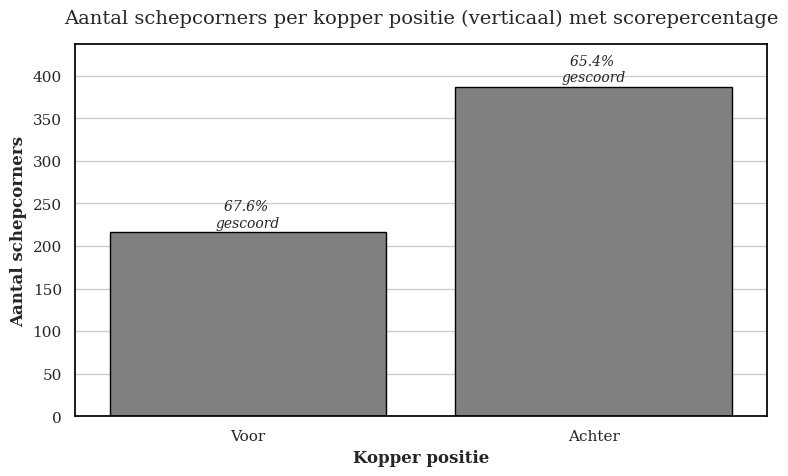

In [18]:
plot_barchart_with_annotations(
    kopper_positie_verticaal_distributie,
    x_column='positie',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Kopper positie',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per kopper positie (verticaal) met scorepercentage',
    hoogte=50
)

In [19]:
# Definieer de groepen dynamisch voor links, midden, rechts
links_posities = ['Linksvoor', 'Linksachter']  # Posities voor 'Links'
midden_posities = ['Middenvoor', 'Middenachter']  # Posities voor 'Midden'
rechts_posities = ['Rechtsvoor', 'Rechtsachter']  # Posities voor 'Rechts'

# Bereken de sommen voor Links, Midden en Rechts
links_data = kopper_positie_distributie[kopper_positie_distributie['positie'].isin(links_posities)]
midden_data = kopper_positie_distributie[kopper_positie_distributie['positie'].isin(midden_posities)]
rechts_data = kopper_positie_distributie[kopper_positie_distributie['positie'].isin(rechts_posities)]

# Sommeer de waarden voor Links, Midden en Rechts
links_schepcorners = links_data['aantal_schepcorners'].sum()
links_gescoord = links_data['aantal_gescoord'].sum()
midden_schepcorners = midden_data['aantal_schepcorners'].sum()
midden_gescoord = midden_data['aantal_gescoord'].sum()
rechts_schepcorners = rechts_data['aantal_schepcorners'].sum()
rechts_gescoord = rechts_data['aantal_gescoord'].sum()

# Bereken de scorepercentages voor elke groep
links_scorepercentage = (links_gescoord / links_schepcorners) * 100 if links_schepcorners != 0 else 0
midden_scorepercentage = (midden_gescoord / midden_schepcorners) * 100 if midden_schepcorners != 0 else 0
rechts_scorepercentage = (rechts_gescoord / rechts_schepcorners) * 100 if rechts_schepcorners != 0 else 0

# Maak het resulterende DataFrame dynamisch
kopper_positie_horizontaal_distributie = pd.DataFrame({
    "positie": ['Links', 'Midden', 'Rechts'],
    "aantal_schepcorners": [links_schepcorners, midden_schepcorners, rechts_schepcorners],
    "aantal_gescoord": [links_gescoord, midden_gescoord, rechts_gescoord],
    "scorepercentage": [links_scorepercentage, midden_scorepercentage, rechts_scorepercentage]
})

# Toon het resultaat
kopper_positie_horizontaal_distributie


,positie,aantal_schepcorners,aantal_gescoord,scorepercentage
0,Links,43,25,58.139535
1,Midden,520,348,66.923077
2,Rechts,40,26,65.000000


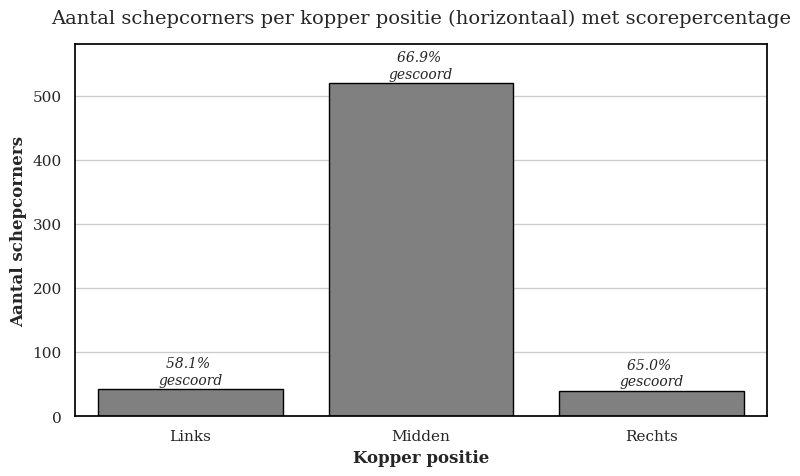

In [20]:
plot_barchart_with_annotations(
    kopper_positie_horizontaal_distributie,
    x_column='positie',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Kopper positie',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per kopper positie (horizontaal) met scorepercentage',
    hoogte=60)

### schepkwaliteit
invloed van de schepkwaliteit op de uitkomst van een schepcorner


In [21]:
corners.columns

Index(['schepcorner_id', 'wedstrijd_id', 'ploegnaam', 'ervaring_schepper',
       'ervaring_kopper', 'ervaring_duo', 'is_thuisploeg', 'kwart',
       'is_schepper_bank', 'is_kopper_bank', 'score_voor',
       'schepper_pos_rechts', 'positie', 'kop_verplaatsen_achter',
       'kop_veel_verplaatsen', 'kop_hor_verplaatsen', 'goal'],
      dtype='object')

In [22]:
# te ver naar achter geschept
verplaatsen_achter_distributie = calculate_distribution_by_column(corners, "kop_verplaatsen_achter")
verplaatsen_achter_distributie['kop_verplaatsen_achter'] = verplaatsen_achter_distributie['kop_verplaatsen_achter'].replace({1: 'Ja', 0: 'Nee'})
verplaatsen_achter_distributie

,kop_verplaatsen_achter,aantal_schepcorners,aantal_gescoord,scorepercentage
0,Nee,541,393,72.643253
1,Ja,62,6,9.677419


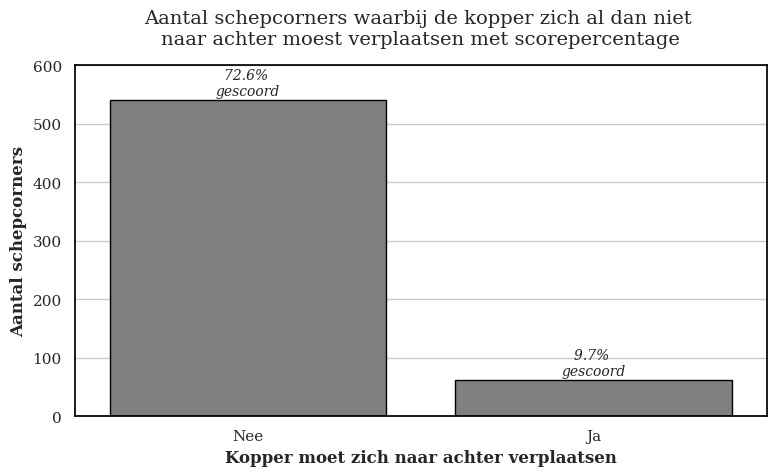

In [23]:
plot_barchart_with_annotations(
    verplaatsen_achter_distributie,
    x_column='kop_verplaatsen_achter',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Kopper moet zich naar achter verplaatsen',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners waarbij de kopper zich al dan niet \nnaar achter moest verplaatsen met scorepercentage',
    hoogte=60
)

In [24]:
# horizonaal verplaatsen
verplaatsen_horizontaal_distributie = calculate_distribution_by_column(corners, "kop_hor_verplaatsen")
verplaatsen_horizontaal_distributie['kop_hor_verplaatsen'] = verplaatsen_horizontaal_distributie['kop_hor_verplaatsen'].replace({1: 'Ja', 0: 'Nee'})
verplaatsen_horizontaal_distributie

,kop_hor_verplaatsen,aantal_schepcorners,aantal_gescoord,scorepercentage
0,Nee,472,377,79.872881
1,Ja,131,22,16.793893


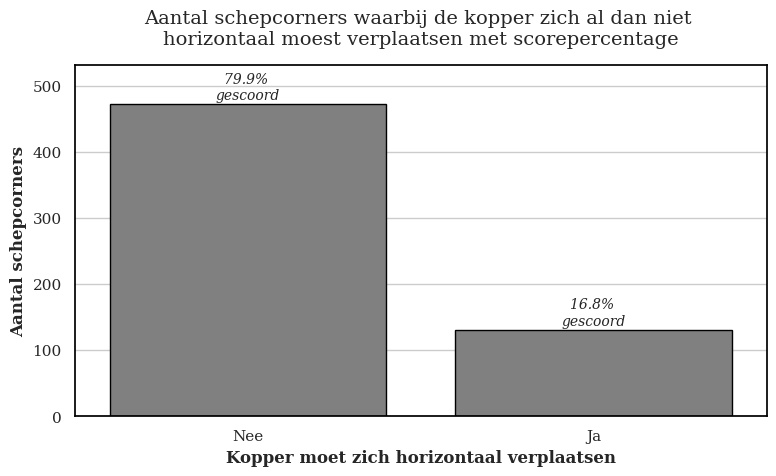

In [25]:
plot_barchart_with_annotations(
    verplaatsen_horizontaal_distributie,
    x_column='kop_hor_verplaatsen',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Kopper moet zich horizontaal verplaatsen',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners waarbij de kopper zich al dan niet \nhorizontaal moest verplaatsen met scorepercentage',
    hoogte=60)

In [26]:
# veel verplaatsen
verplaatsen_veel_distributie = calculate_distribution_by_column(corners, "kop_veel_verplaatsen")
verplaatsen_veel_distributie['kop_veel_verplaatsen'] = verplaatsen_veel_distributie['kop_veel_verplaatsen'].replace({1: 'Ja', 0: 'Nee'})
verplaatsen_veel_distributie

,kop_veel_verplaatsen,aantal_schepcorners,aantal_gescoord,scorepercentage
0,Nee,494,389,78.744939
1,Ja,109,10,9.174312


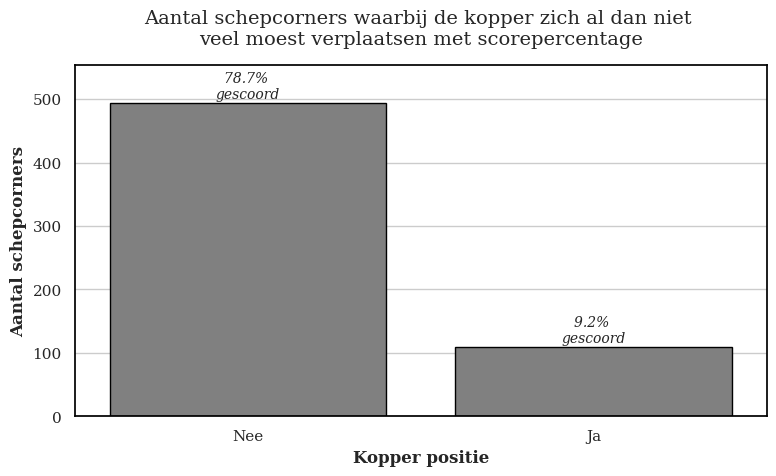

In [27]:
plot_barchart_with_annotations(
    verplaatsen_veel_distributie,
    x_column='kop_veel_verplaatsen',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Kopper positie',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners waarbij de kopper zich al dan niet \nveel moest verplaatsen met scorepercentage',
    hoogte=60)

In [28]:
# goed geschept (niet naar achter, horizontaal of veel verplaatsen)
corners["goed_geschept"] = (1-corners["kop_verplaatsen_achter"]) * (1-corners["kop_hor_verplaatsen"]) * (1-corners["kop_veel_verplaatsen"])

In [29]:
goed_geschept_distributie = calculate_distribution_by_column(corners, "goed_geschept")
goed_geschept_distributie['goed_geschept'] = goed_geschept_distributie['goed_geschept'].replace({1: 'Ja', 0: 'Nee'})
goed_geschept_distributie

,goed_geschept,aantal_schepcorners,aantal_gescoord,scorepercentage
0,Nee,191,33,17.277487
1,Ja,412,366,88.834951


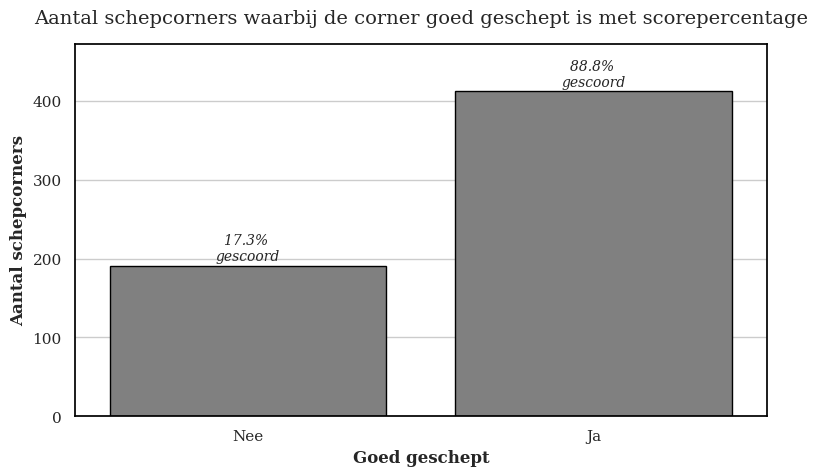

In [30]:
plot_barchart_with_annotations(
    goed_geschept_distributie,
    x_column='goed_geschept',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Goed geschept',
    y_label='Aantal schepcorners', 
    titel='Aantal schepcorners waarbij de corner goed geschept is met scorepercentage',
    hoogte=60
)


In [31]:
### ervaringsniveau
corners["ervaringsniveau"] = round((corners["ervaring_duo"]+corners["ervaring_schepper"]+corners["ervaring_kopper"])/3)
corners["ervaringsniveau"].unique()

array([ 4.,  3.,  2., nan,  1.,  5.])

In [32]:
ervaring_corners = corners[corners["ervaringsniveau"].notna()]

In [33]:
ervaring_corners.head()

,schepcorner_id,wedstrijd_id,ploegnaam,ervaring_schepper,ervaring_kopper,ervaring_duo,is_thuisploeg,kwart,is_schepper_bank,is_kopper_bank,score_voor,schepper_pos_rechts,positie,kop_verplaatsen_achter,kop_veel_verplaatsen,kop_hor_verplaatsen,goal,goed_geschept,ervaringsniveau
0,1,1,marathon,4.0,4.0,4.0,1,1,1,0,0v0,1,5,0,0,0,1,1,4.0
1,2,1,marathon,4.0,4.0,4.0,1,2,0,0,2v0,1,5,0,0,0,0,1,4.0
2,3,1,poba juniors,3.0,2.0,3.0,0,3,0,0,2v0,0,2,0,0,1,0,0,3.0
3,4,2,mvc rudie,4.0,5.0,4.0,1,3,1,0,4v1,1,5,0,1,1,0,0,4.0
4,5,2,uncle abes patty pounders,1.0,5.0,1.0,0,3,1,0,5v2,1,5,0,0,0,0,1,2.0


In [34]:
algemene_ervaring_distributie = calculate_distribution_by_column(ervaring_corners, "ervaringsniveau")
algemene_ervaring_distributie['ervaringsniveau'] = algemene_ervaring_distributie['ervaringsniveau'].astype(int)
algemene_ervaring_distributie

,ervaringsniveau,aantal_schepcorners,aantal_gescoord,scorepercentage
0,1,8,2,25.000000
1,2,42,17,40.476190
2,3,75,45,60.000000
3,4,139,101,72.661871
4,5,158,124,78.481013


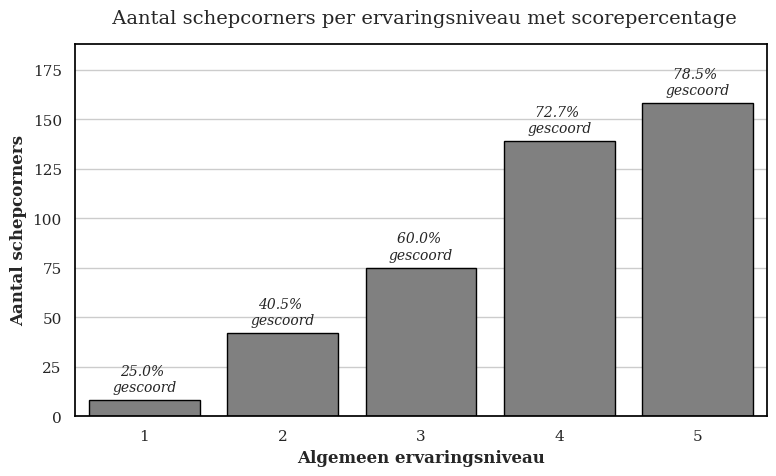

In [35]:
plot_barchart_with_annotations(
    algemene_ervaring_distributie,
    x_column='ervaringsniveau',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Algemeen ervaringsniveau',
    y_label='Aantal schepcorners',
    titel=' Aantal schepcorners per ervaringsniveau met scorepercentage',
)

In [36]:
duo_ervaring_distributie = calculate_distribution_by_column(ervaring_corners, "ervaring_duo")
duo_ervaring_distributie['ervaring_duo'] = duo_ervaring_distributie['ervaring_duo'].astype(int)
duo_ervaring_distributie

,ervaring_duo,aantal_schepcorners,aantal_gescoord,scorepercentage
0,1,32,15,46.875000
1,2,33,16,48.484848
2,3,76,41,53.947368
3,4,119,89,74.789916
4,5,162,128,79.012346


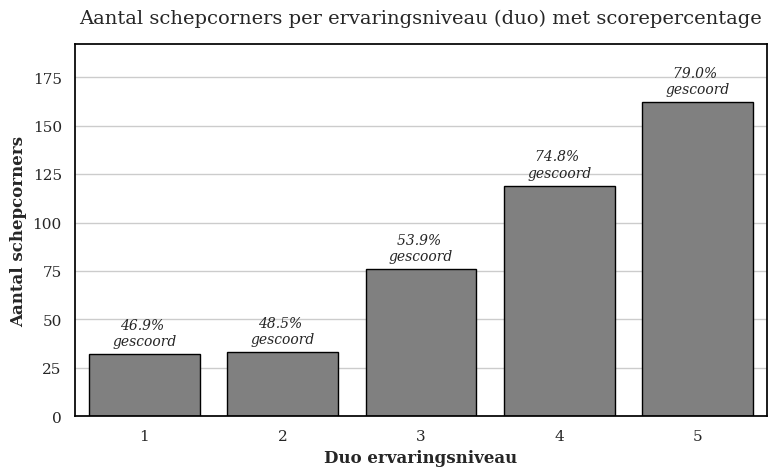

In [37]:
plot_barchart_with_annotations(
    duo_ervaring_distributie,
    x_column='ervaring_duo',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Duo ervaringsniveau',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per ervaringsniveau (duo) met scorepercentage',
    )

In [38]:
kopper_ervaring_distributie = calculate_distribution_by_column(ervaring_corners, "ervaring_kopper")
kopper_ervaring_distributie['ervaring_kopper'] = kopper_ervaring_distributie['ervaring_kopper'].astype(int)
kopper_ervaring_distributie

,ervaring_kopper,aantal_schepcorners,aantal_gescoord,scorepercentage
0,1,17,6,35.294118
1,2,27,8,29.629630
2,3,73,46,63.013699
3,4,127,94,74.015748
4,5,178,135,75.842697


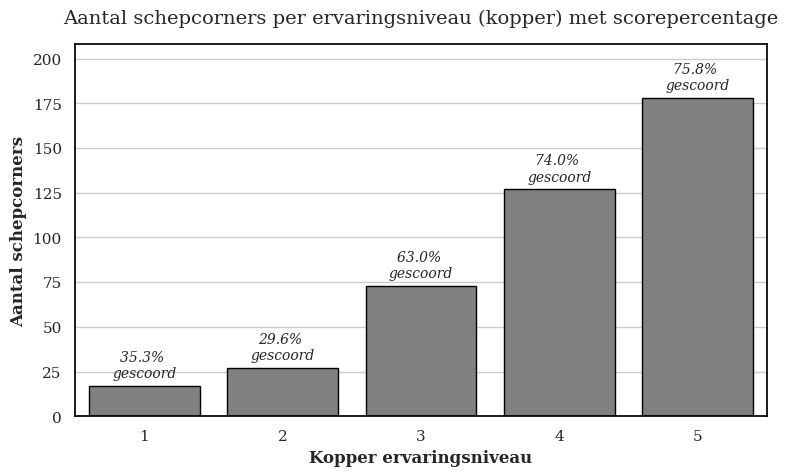

In [39]:
plot_barchart_with_annotations(
    kopper_ervaring_distributie,
    x_column='ervaring_kopper',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Kopper ervaringsniveau',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per ervaringsniveau (kopper) met scorepercentage',
    )

In [40]:
schepper_ervaring_distributie = calculate_distribution_by_column(ervaring_corners, "ervaring_schepper")
schepper_ervaring_distributie['ervaring_schepper'] = schepper_ervaring_distributie['ervaring_schepper'].astype(int)
schepper_ervaring_distributie

,ervaring_schepper,aantal_schepcorners,aantal_gescoord,scorepercentage
0,1,15,7,46.666667
1,2,21,5,23.809524
2,3,67,34,50.746269
3,4,149,113,75.838926
4,5,170,130,76.470588


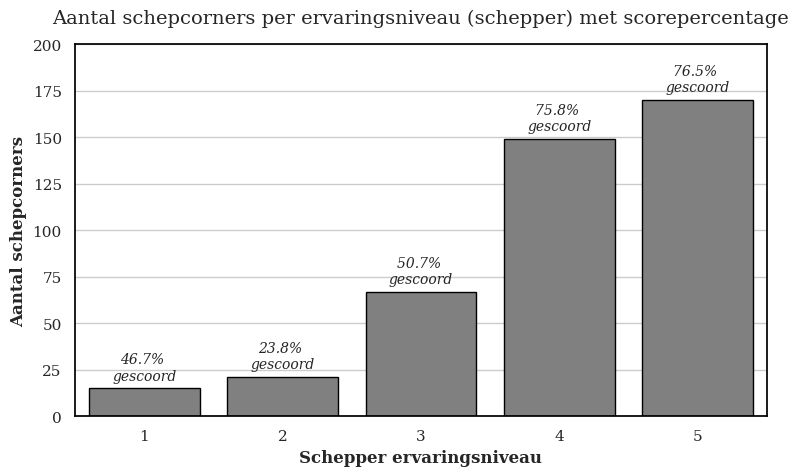

In [41]:
plot_barchart_with_annotations(
    schepper_ervaring_distributie,
    x_column='ervaring_schepper',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Schepper ervaringsniveau',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per ervaringsniveau (schepper) met scorepercentage',
    )

In [42]:
### bank
def bank_verschillen(row):
    if row["is_schepper_bank"] == 1 and row["is_kopper_bank"] == 1:
        return "beide"
    elif row["is_schepper_bank"] == 1 and row["is_kopper_bank"] == 0:
        return "schepper"
    elif row["is_kopper_bank"] == 1 and row["is_schepper_bank"] == 0:
        return "kopper"
    else:
        return "niemand"
    
corners["bank"] = corners.apply(bank_verschillen, axis=1)

In [43]:
bank_distributie = calculate_distribution_by_column(corners, "bank")
bank_distributie


,bank,aantal_schepcorners,aantal_gescoord,scorepercentage
0,beide,2,2,100.000000
1,kopper,65,41,63.076923
2,niemand,450,306,68.000000
3,schepper,86,50,58.139535


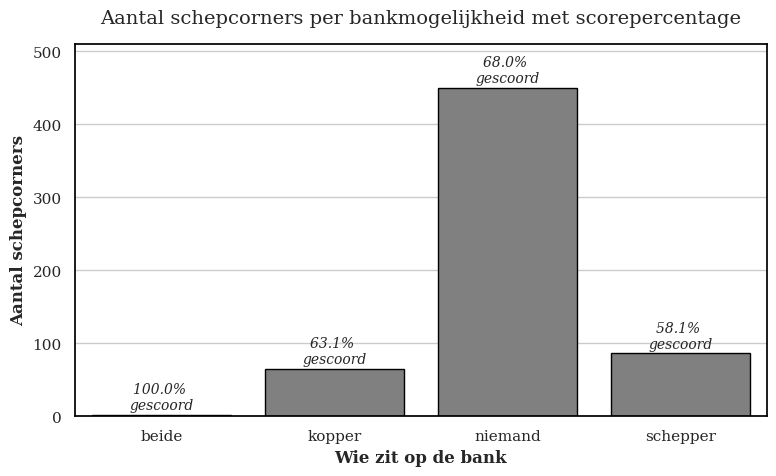

In [44]:
plot_barchart_with_annotations(
    bank_distributie,
    x_column='bank',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Wie zit op de bank',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per bankmogelijkheid met scorepercentage',
    hoogte=60
)

### bekijken per team

In [45]:
merged_df.columns

Index(['wedstrijd_id', 'datum', 'niveau', 'uitslag', 'corners_uitslag',
       'klassement_uitslag', 'schepcorner_id', 'ploegnaam',
       'ervaring_schepper', 'ervaring_kopper', 'ervaring_duo', 'is_thuisploeg',
       'kwart', 'is_schepper_bank', 'is_kopper_bank', 'score_voor',
       'schepper_pos_rechts', 'positie', 'kop_verplaatsen_achter',
       'kop_veel_verplaatsen', 'kop_hor_verplaatsen', 'goal'],
      dtype='object')

In [46]:
team_df = merged_df[["wedstrijd_id", "schepcorner_id", "ploegnaam", "goal"]]

In [47]:
stats_per_team = team_df.groupby("ploegnaam").agg(
    aantal_wedstrijden=("wedstrijd_id", "nunique"),
    aantal_schepcorners=("schepcorner_id", "count"),
    aantal_gescoord=("goal", "sum"),
    scorepercentage=("goal", lambda x: x.sum() / len(x) * 100)
).reset_index()

In [48]:
stats_per_team.sort_values(by="aantal_wedstrijden", ascending=False, inplace=True)

In [49]:
stats_per_team_min_schepcorners = stats_per_team[stats_per_team["aantal_schepcorners"] >= 5]
stats_per_team_min_schepcorners

,ploegnaam,aantal_wedstrijden,aantal_schepcorners,aantal_gescoord,scorepercentage
76,fc spitbulls,20,29,19.0,65.517241
111,marathon,19,38,20.0,52.631579
168,spowerrangers,14,18,10.0,55.555556
183,the oliver boys,11,17,15.0,88.235294
39,de graly's,8,11,6.0,54.545455
185,thomas cook sport,8,10,7.0,70.000000
72,fc dier,7,9,6.0,66.666667
55,drongen,6,13,10.0,76.923077
198,vv int mandje,6,16,10.0,62.500000
65,erwetegem,5,11,10.0,90.909091


### Probleem met deze graph!!!

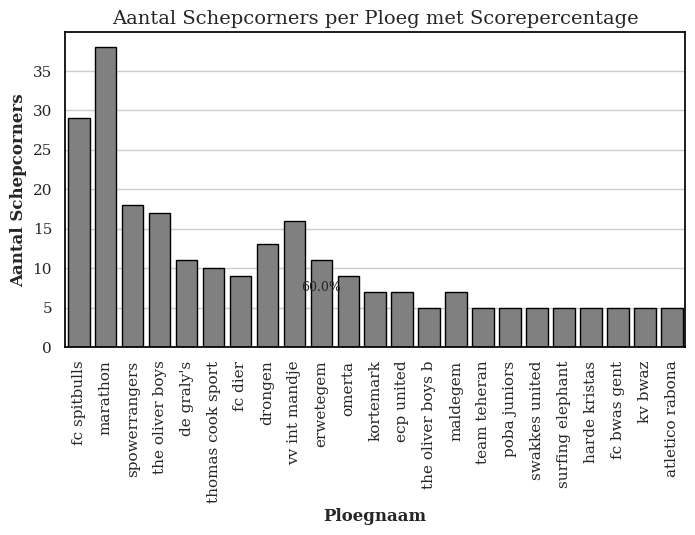

In [50]:
# Stel de academische stijl in
sns.set_theme(style="whitegrid", font_scale=1.2, rc={
    'axes.edgecolor': 'black',
    'axes.labelweight': 'bold',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'font.family': 'serif'
})

# Stel de plot in
plt.figure(figsize=(8, 5))

# Maak een balkgrafiek met Seaborn
ax = sns.barplot(
    data=stats_per_team_min_schepcorners,  # Je dataframe
    x="ploegnaam",  # x-as: ploegnaam
    y="aantal_schepcorners",  # y-as: aantal schepcorners
    color='grey',  # Kleuren van de balken
    edgecolor='black'  # Randkleur van de balken
)

# Voeg annotaties toe boven de balken voor het scorepercentage
for i, row in stats_per_team_min_schepcorners.iterrows():
    ax.annotate(
        f"{row['scorepercentage']:.1f}%",  # De tekst die we willen annoteren
        (i, row["aantal_schepcorners"]),  # Positie op de balk
        textcoords="offset points",  # Gebruik offset punten om de tekst te verplaatsen
        xytext=(0, 10),  # Verplaats de annotatie 10 punten boven de balk
        ha="center", va="bottom", fontsize=9
    )

# Titels en labels aanpassen
ax.set_title("Aantal Schepcorners per Ploeg met Scorepercentage", fontsize=14)
ax.set_xlabel("Ploegnaam", fontsize=12)
ax.set_ylabel("Aantal Schepcorners", fontsize=12)

# Draai de x-as labels voor betere leesbaarheid
plt.xticks(rotation=90)

# Pas de marges aan om ruimte te maken voor lange x-as labels
plt.subplots_adjust(bottom=0.25)

# Toon de plot
plt.show()


In [51]:
### te weinig om iets nuttigs over te zeggen

### Significanties testen

In [52]:
def chi_square_test(df, group_col):
    """
    Voert een chi-kwadraat test uit op scorepercentages per groep.

    Args:
        df (pd.DataFrame): DataFrame met kolommen [group_col, aantal_schepcorners, scorepercentage]
        group_col (str): Kolomnaam waarop je wilt groeperen.

    Returns:
        chi2, p_value, degrees_of_freedom, expected (alles uit chi2_contingency)
    """

    # Bereken aantal gescoorde en niet-gescoorde corners
    df = df.copy()
    df['aantal_scores'] = np.round(df['scorepercentage'] / 100 * df['aantal_schepcorners']).astype(int)
    df['aantal_missers'] = df['aantal_schepcorners'] - df['aantal_scores']

    # Maak een kruistabel: rijen = groepen, kolommen = gescoord / niet gescoord
    table = df[[group_col, 'aantal_scores', 'aantal_missers']]
    contingency_table = table.set_index(group_col)

    # Voer chi-kwadraat test uit
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print("Chi-kwadraat statistiek:", chi2)
    print("Vrijheidsgraden:", dof)
    print("p-waarde:", p_value)

    return chi2, p_value, dof, expected


In [53]:
# niveau
chi2_niveau, p_niveau, dof_niveau, expected_niveau = chi_square_test(niveau_distributie, 'niveau')

Chi-kwadraat statistiek: 26.81101929708377
Vrijheidsgraden: 6
p-waarde: 0.00015709999191823533


In [54]:
# kwart
chi2_kwart, p_kwart, dof_kwart, expected_kwart = chi_square_test(kwart_distributie, 'kwart')

Chi-kwadraat statistiek: 5.2205931913478585
Vrijheidsgraden: 3
p-waarde: 0.1563387653674886


In [55]:
# test om te kijken of aantal schepcorners per kwart significant verschilt
kwart_distributie

observed = kwart_distributie["aantal_schepcorners"].values.tolist()
expected = [kwart_distributie["aantal_schepcorners"].sum() / 4] * 4
chi2, p = chisquare(observed, expected)
print(f"Chi-kwadraat statistiek: {chi2}")   
print(f"p-waarde: {p}")

Chi-kwadraat statistiek: 74.32669983416251
p-waarde: 5.051311387200541e-16


In [56]:
chi2_schepper_positie, p_schepper_positie, dof_schepper_positie, expected_schepper_positie = chi_square_test(schepper_positie_distributie, 'schepper_pos_rechts')


Chi-kwadraat statistiek: 0.037179530308988046
Vrijheidsgraden: 1
p-waarde: 0.8470999845407083


In [57]:
chi2_kopper_positie, p_kopper_positie, dof_kopper_positie, expected_kopper_positie = chi_square_test(kopper_positie_distributie, 'positie')

Chi-kwadraat statistiek: 2.6357808861598544
Vrijheidsgraden: 5
p-waarde: 0.7559215642436913


In [58]:
chi2_kopper_positie_horizontaal, p_kopper_positie_horizontaal, dof_kopper_positie_horizontaal, expected_kopper_positie_horizontaal = chi_square_test(kopper_positie_horizontaal_distributie, 'positie')


Chi-kwadraat statistiek: 1.3949425349652147
Vrijheidsgraden: 2
p-waarde: 0.49784262424032477


In [59]:
chi2_kopper_positie_verticaal, p_kopper_positie_verticaal, dof_kopper_positie_verticaal, expected_kopper_positie_verticaal = chi_square_test(kopper_positie_verticaal_distributie, 'positie')

Chi-kwadraat statistiek: 0.2136056572261702
Vrijheidsgraden: 1
p-waarde: 0.6439558866198258


In [60]:
chi2_goed_geschept, p_goed_geschept, dof_goed_geschept, expected_goed_geschept = chi_square_test(goed_geschept_distributie, 'goed_geschept')

Chi-kwadraat statistiek: 295.31910879426334
Vrijheidsgraden: 1
p-waarde: 3.4483097026936686e-66


In [61]:
chi2_verplaatsen_achter, p_verplaatsen_achter, dof_verplaatsen_achter, expected_verplaatsen_achter = chi_square_test(verplaatsen_achter_distributie, 'kop_verplaatsen_achter')


Chi-kwadraat statistiek: 95.72473308711744
Vrijheidsgraden: 1
p-waarde: 1.3202074762513847e-22


In [62]:
chi2_verplaatsen_horizontaal, p_verplaatsen_horizontaal, dof_verplaatsen_horizontaal, expected_verplaatsen_horizontaal = chi_square_test(verplaatsen_horizontaal_distributie, 'kop_hor_verplaatsen')


Chi-kwadraat statistiek: 179.455407901643
Vrijheidsgraden: 1
p-waarde: 6.372764062138798e-41


In [63]:
chi2_verplaatsen_veel, p_verplaatsen_veel, dof_verplaatsen_veel, expected_verplaatsen_veel = chi_square_test(verplaatsen_veel_distributie, 'kop_veel_verplaatsen')

Chi-kwadraat statistiek: 189.97678141116006
Vrijheidsgraden: 1
p-waarde: 3.2166155759515035e-43


In [64]:
chi2_algemene_ervaring, p_algemene_ervaring, dof_algemene_ervaring, expected_algemene_ervaring = chi_square_test(algemene_ervaring_distributie, 'ervaringsniveau')


Chi-kwadraat statistiek: 33.21421890996361
Vrijheidsgraden: 4
p-waarde: 1.079722290633415e-06


In [65]:
chi2_duo_ervaring, p_duo_ervaring, dof_duo_ervaring, expected_duo_ervaring = chi_square_test(duo_ervaring_distributie, 'ervaring_duo')


Chi-kwadraat statistiek: 30.991132746446098
Vrijheidsgraden: 4
p-waarde: 3.0741727014660775e-06


In [66]:
chi2_kopper_ervaring, p_kopper_ervaring, dof_kopper_ervaring, expected_kopper_ervaring = chi_square_test(kopper_ervaring_distributie, 'ervaring_kopper')


Chi-kwadraat statistiek: 34.83982607652762
Vrijheidsgraden: 4
p-waarde: 5.010896907167802e-07


In [67]:
chi2_schepper_ervaring, p_schepper_ervaring, dof_schepper_ervaring, expected_schepper_ervaring = chi_square_test(schepper_ervaring_distributie, 'ervaring_schepper')

Chi-kwadraat statistiek: 41.25145741347747
Vrijheidsgraden: 4
p-waarde: 2.3841335975775112e-08


In [68]:
chi2_bank, p_bank, dof_bank, expected_bank = chi_square_test(bank_distributie, 'bank')

Chi-kwadraat statistiek: 4.450991796021676
Vrijheidsgraden: 3
p-waarde: 0.2167035859951165


### positie per niveau vergelijken

In [69]:
merged_df.columns

Index(['wedstrijd_id', 'datum', 'niveau', 'uitslag', 'corners_uitslag',
       'klassement_uitslag', 'schepcorner_id', 'ploegnaam',
       'ervaring_schepper', 'ervaring_kopper', 'ervaring_duo', 'is_thuisploeg',
       'kwart', 'is_schepper_bank', 'is_kopper_bank', 'score_voor',
       'schepper_pos_rechts', 'positie', 'kop_verplaatsen_achter',
       'kop_veel_verplaatsen', 'kop_hor_verplaatsen', 'goal'],
      dtype='object')

In [70]:
pos_per_niveau_norm = merged_df.groupby("niveau")["positie"].value_counts(normalize=True).unstack().fillna(0)
pos_per_niveau = merged_df.groupby("niveau")["positie"].value_counts().unstack().fillna(0).astype(int)

In [71]:
pos_per_niveau

positie,1.0,2.0,3.0,4.0,5.0,6.0
niveau,,,,,,
1,1,20,0,1,20,0
2,2,13,1,6,50,3
3,6,51,8,9,101,7
4,1,41,3,16,132,13
n1,0,55,5,0,21,0
n4,0,5,0,0,8,0
p2,1,3,0,0,0,0


In [72]:
pos_per_niveau_norm = pos_per_niveau_norm.round(2)
pos_per_niveau_norm

positie,1.0,2.0,3.0,4.0,5.0,6.0
niveau,,,,,,
1,0.02,0.48,0.00,0.02,0.48,0.00
2,0.03,0.17,0.01,0.08,0.67,0.04
3,0.03,0.28,0.04,0.05,0.55,0.04
4,0.00,0.20,0.01,0.08,0.64,0.06
n1,0.00,0.68,0.06,0.00,0.26,0.00
n4,0.00,0.38,0.00,0.00,0.62,0.00
p2,0.25,0.75,0.00,0.00,0.00,0.00


In [73]:
# recreate with three levels, nationaal(n), kern_hoog (1,2), kern_laag (3,4)
niveaus_agg = merged_df.copy()
niveaus_agg["niveau"] = niveaus_agg["niveau"].replace({"n1": "nationaal", "n4": "nationaal", 1: "kern_hoog", 2: "kern_hoog", 3: "kern_laag", 4: "kern_laag"})
niveaus_agg = niveaus_agg[niveaus_agg["niveau"] != "p2"]
pos_per_niveau_agg_norm = niveaus_agg.groupby("niveau")["positie"].value_counts(normalize=True).unstack().fillna(0)
pos_per_niveau_agg = niveaus_agg.groupby("niveau")["positie"].value_counts().unstack().fillna(0).astype(int)
pos_per_niveau_agg_norm = pos_per_niveau_agg_norm.round(2)

In [74]:
pos_per_niveau_agg_norm

positie,1.0,2.0,3.0,4.0,5.0,6.0
niveau,,,,,,
kern_hoog,0.03,0.28,0.01,0.06,0.60,0.03
kern_laag,0.02,0.24,0.03,0.06,0.60,0.05
nationaal,0.00,0.64,0.05,0.00,0.31,0.00


In [75]:
### verschil als we groupen per niveau en positie qua scoringspercentages
niveaus_agg.columns

Index(['wedstrijd_id', 'datum', 'niveau', 'uitslag', 'corners_uitslag',
       'klassement_uitslag', 'schepcorner_id', 'ploegnaam',
       'ervaring_schepper', 'ervaring_kopper', 'ervaring_duo', 'is_thuisploeg',
       'kwart', 'is_schepper_bank', 'is_kopper_bank', 'score_voor',
       'schepper_pos_rechts', 'positie', 'kop_verplaatsen_achter',
       'kop_veel_verplaatsen', 'kop_hor_verplaatsen', 'goal'],
      dtype='object')

In [76]:
niveaus_posities_agg = (
    niveaus_agg.groupby(["niveau", "positie"])
      .agg(
          aantal_schepcorners = ("schepcorner_id", "count"),
          aantal_gescoord = ("goal", "sum")
      )
      .reset_index()
)

# Voeg scorepercentage toe
niveaus_posities_agg["scorepercentage"] = (
    niveaus_posities_agg["aantal_gescoord"] / niveaus_posities_agg["aantal_schepcorners"] * 100
)

print(niveaus_posities_agg)


       niveau  positie  aantal_schepcorners  aantal_gescoord  scorepercentage
0   kern_hoog      1.0                    3              1.0        33.333333
1   kern_hoog      2.0                   33             22.0        66.666667
2   kern_hoog      3.0                    1              0.0         0.000000
3   kern_hoog      4.0                    7              5.0        71.428571
4   kern_hoog      5.0                   70             52.0        74.285714
5   kern_hoog      6.0                    3              3.0       100.000000
6   kern_laag      1.0                    7              5.0        71.428571
7   kern_laag      2.0                   92             54.0        58.695652
8   kern_laag      3.0                   11              6.0        54.545455
9   kern_laag      4.0                   25             14.0        56.000000
10  kern_laag      5.0                  233            143.0        61.373391
11  kern_laag      6.0                   20             13.0    

In [77]:
# opsplitsen per niveau en plotten
kern_hoog_df = niveaus_posities_agg[niveaus_posities_agg["niveau"] == "kern_hoog"].copy()
kern_laag_df = niveaus_posities_agg[niveaus_posities_agg["niveau"] == "kern_laag"].copy()
nationaal_df = niveaus_posities_agg[niveaus_posities_agg["niveau"] == "nationaal"].copy()

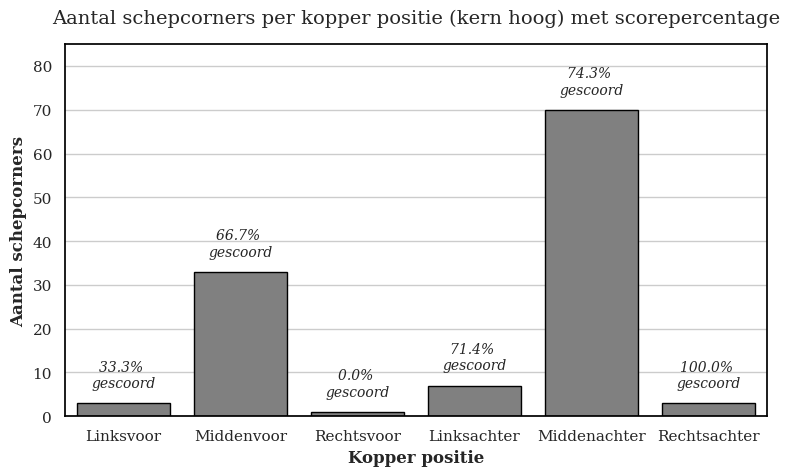

In [78]:
# kern hoog plotten
kern_hoog_df["positie"] = kern_hoog_df["positie"].replace({1: "Linksvoor", 2: "Middenvoor", 3: "Rechtsvoor", 4: "Linksachter", 5: "Middenachter", 6: "Rechtsachter"})
plot_barchart_with_annotations(
    kern_hoog_df,
    x_column='positie',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Kopper positie',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per kopper positie (kern hoog) met scorepercentage',
    hoogte=15
)

In [79]:
kern_laag_df

,niveau,positie,aantal_schepcorners,aantal_gescoord,scorepercentage
6,kern_laag,1.0,7,5.0,71.428571
7,kern_laag,2.0,92,54.0,58.695652
8,kern_laag,3.0,11,6.0,54.545455
9,kern_laag,4.0,25,14.0,56.000000
10,kern_laag,5.0,233,143.0,61.373391
11,kern_laag,6.0,20,13.0,65.000000


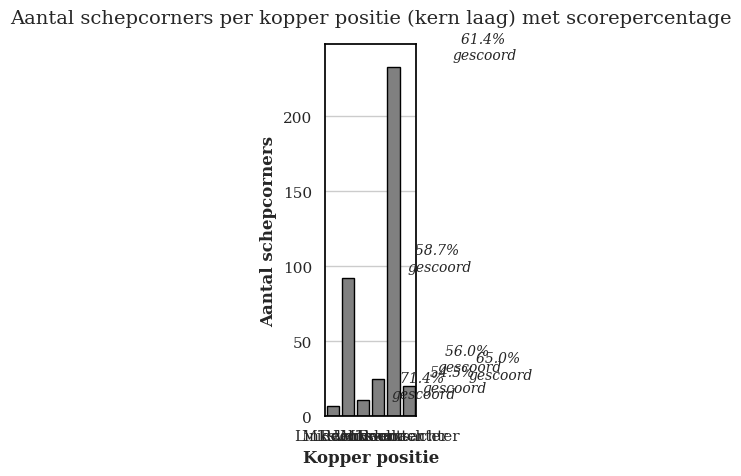

In [80]:
# kern_laag plotten
kern_laag_df["positie"] = kern_laag_df["positie"].replace({1: "Linksvoor", 2: "Middenvoor", 3: "Rechtsvoor", 4: "Linksachter", 5: "Middenachter", 6: "Rechtsachter"})
plot_barchart_with_annotations(
    kern_laag_df,
    x_column='positie',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Kopper positie',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per kopper positie (kern laag) met scorepercentage',
    hoogte=15)

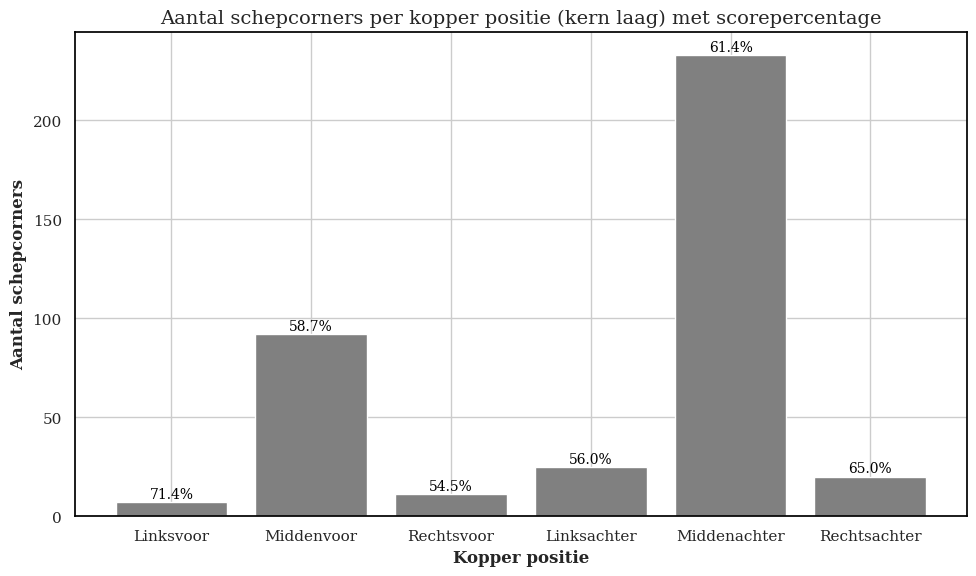

In [81]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(kern_laag_df["positie"], kern_laag_df["aantal_schepcorners"], color='grey')

# Academische stijl instellen
sns.set_theme(style="whitegrid", font_scale=1.2, rc={
    'axes.edgecolor': 'black',
    'axes.labelweight': 'bold',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'font.family': 'serif'
    })

# Annotaties toevoegen (scorepercentage)
for bar, percentage in zip(bars, kern_laag_df["scorepercentage"]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=10, color='black')

# Labels en titel
ax.set_xlabel("Kopper positie")
ax.set_ylabel("Aantal schepcorners")
ax.set_title("Aantal schepcorners per kopper positie (kern laag) met scorepercentage")

plt.tight_layout()
plt.show()

C:\Users\cosyn\AppData\Local\Temp\ipykernel_23084\2055160333.py:54: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


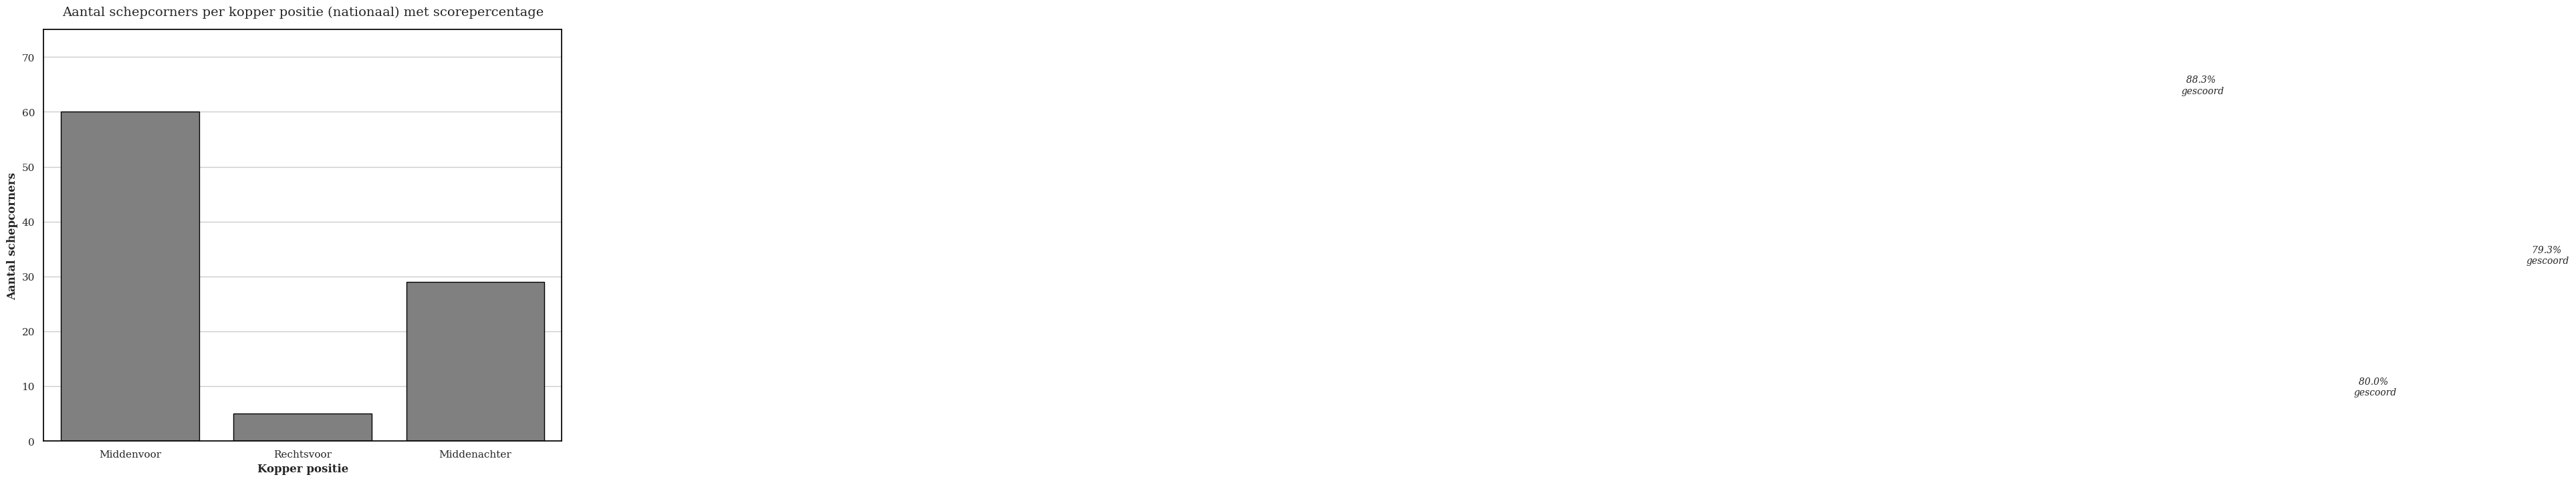

In [82]:
# nationaal plotten
nationaal_df["positie"] = nationaal_df["positie"].replace({1: "Linksvoor", 2: "Middenvoor", 3: "Rechtsvoor", 4: "Linksachter", 5: "Middenachter", 6: "Rechtsachter"})
plot_barchart_with_annotations(
    nationaal_df,
    x_column='positie',
    y_column='aantal_schepcorners',
    annotation_column='scorepercentage',
    x_label='Kopper positie',
    y_label='Aantal schepcorners',
    titel='Aantal schepcorners per kopper positie (nationaal) met scorepercentage',
    hoogte=15,
    figsize=(10, 8),
)   

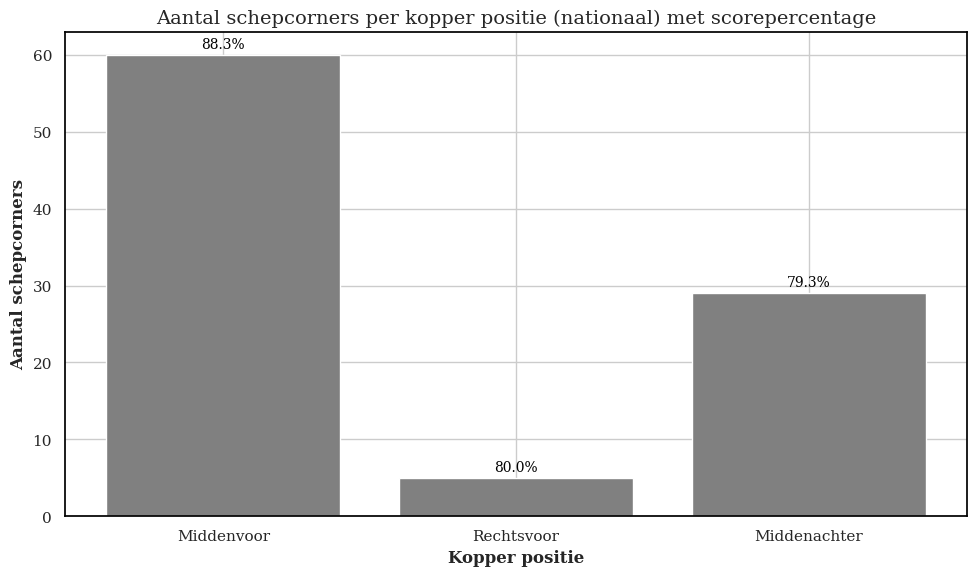

In [83]:

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(nationaal_df["positie"], nationaal_df["aantal_schepcorners"], color='grey')

# Academische stijl instellen
sns.set_theme(style="whitegrid", font_scale=1.2, rc={
    'axes.edgecolor': 'black',
    'axes.labelweight': 'bold',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'font.family': 'serif'
    })

# Annotaties toevoegen (scorepercentage)
for bar, percentage in zip(bars, nationaal_df["scorepercentage"]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=10, color='black')

# Labels en titel
ax.set_xlabel("Kopper positie")
ax.set_ylabel("Aantal schepcorners")
ax.set_title("Aantal schepcorners per kopper positie (nationaal) met scorepercentage")

plt.tight_layout()
plt.show()

In [ ]:
### aantal schepcorners voor winnaars versus verliezers versus gelijkspel
# Initialiseer tellers
corners_winnaars = 0
corners_verliezers = 0
corners_gelijkspel = 0
n_gelijkspel = 0

# Per wedstrijd_id de winnaar bepalen
for wedstrijd_id, groep in merged_df.groupby("wedstrijd_id"):
    try:
        # Eindscore parsen
        eind_thuis, eind_uit = map(int, str(groep["uitslag"].iloc[0]).split('v'))
    except:
        continue  # sla over als uitslag niet bruikbaar is

    if eind_thuis == eind_uit:
        corners_gelijkspel += len(groep)
        n_gelijkspel += 1
        continue

    # True = thuis wint, False = uit wint
    thuis_wint = eind_thuis > eind_uit

    # Tel corners op basis van ploeg
    corners_winnaars += (groep["is_thuisploeg"] == thuis_wint).sum()
    corners_verliezers += (groep["is_thuisploeg"] != thuis_wint).sum()

n_geen_gelijkspel = aantal_wedstrijden - n_gelijkspel

# Print resultaat
print(f"Totaal aantal schepcorners door winnaars: {corners_winnaars}")
print(f"Totaal aantal schepcorners door verliezers: {corners_verliezers}")
print(f"Totaal aantal schepcorners bij gelijkspel: {corners_gelijkspel}")
print("-" * 50)
print(f"gemiddeld aantal schepcorners per wedstrijd per ploeg (winnaars): {corners_winnaars / n_geen_gelijkspel:.2f}")
print(f"gemiddeld aantal schepcorners per wedstrijd per ploeg (verliezers): {corners_verliezers / n_geen_gelijkspel:.2f}")
print(f"gemiddeld aantal schepcorners per wedstrijd per ploeg (gelijkspel): {corners_gelijkspel / n_gelijkspel/2:.2f}") # omdat er 2 ploegen gelijkspelen per gelijke match


Totaal aantal schepcorners door winnaars: 304
Totaal aantal schepcorners door verliezers: 236
Totaal aantal schepcorners bij gelijkspel: 64
--------------------------------------------------
gemiddeld aantal schepcorners per wedstrijd (winnaars): 1.48
gemiddeld aantal schepcorners per wedstrijd (verliezers): 1.15
gemiddeld aantal schepcorners per wedstrijd (gelijkspel): 1.23
